# Practical: Solution to The HALD Knowledge Graph


This section has been inspired by the work of Robert Haas on Biomedical Knowledge Graphs which can be found at 
https://github.com/robert-haas/awesome-biomedical-knowledge-graphs/tree/main

The source of the data is the webpage on [Figshare](https://figshare.com/articles/dataset/HALD_a_human_aging_and_longevity_knowledge_graph_for_precision_gerontology_and_geroscience_analyses/22828196). This include versions in JSON and CSV. The CSV versions are structured for a particular package which we will not be using, so we will use the json packages which are more general.

First we'll create a data directory.

In [68]:
import os
Download = False
datadir = "HALD_Dataset"
if not os.path.exists(datadir):
    os.mkdir(datadir)

Now we define the list of the files that we want to download. We'll define a *list* of *tuples*, with each tuple representing one of the files that we want to fetch, specifying three things:

* The name that we want the file to be called.
* The URL from where it will be downloaded.
* The MD5 checksum which will allow us to verify the downloaded file's integrity.

In [69]:
# List of files to download
filelist = [
    ("Entity_info.json", "https://figshare.com/ndownloader/files/43612509", '1746cde24a1bac0460f1ccf646608cc9'),
    ("Literature_Info.json", "https://figshare.com/ndownloader/files/43612512", "10b78e8ec30f5b85f2a58d8fe24f056b"),
    ("Longevity_Biomarkers.json", "https://figshare.com/ndownloader/files/43612497", "0dbd9c3f8474dc3cd744ed38af460d75"),
    ("Relation_Info.json", "https://figshare.com/ndownloader/files/43612506", "0c1fa199269adc58f64ad4d5b9fd87b9"),
    ("Aging_Biomarkers.json", "https://figshare.com/ndownloader/files/43612503", "abd0eb6cb7295ae500c5d676b7797324")
]

Now we can download the files. For each file in `filelist` we will:

* Download the file from the URL.
* If the download request indicates that the download is unsuccessful, print an error.
* If the download is successfull, verify the checksum and if that is correct, write the file to disk in `datadir`

In [70]:
import requests
import hashlib

if Download:
    for f in filelist:
        response = requests.get(f[1])
        file_Path = datadir + "/" + f[0]
        if response.status_code != 200:
            print('Failed to download file {f[0]} from {f[1]}')
        else:
            m = hashlib.md5()
            m.update(response.content)
            if m.hexdigest() == f[2]:
                print(f"SUCCESS: File {f[0]} downloaded from {f[1]} with correct checksum {f[2]}")
                with open(file_Path, 'wb') as file:
                    file.write(response.content)
            else:
                print(f"ERROR: File {f[0]} downloaded from {f[1]} with incorrect checksum {m.hexdigest()} (should be {f[2]})")            


## What does the data look like?

Let us inspect these files. The two key files here are those containing the *entities* (nodes) and the *edges* (relations).

In [71]:
import json

def load_json(fname):
    with open(fname, 'rb') as file:
        return json.load(file)

nodes = load_json(f"{datadir}/{filelist[0][0]}")
edges = load_json(f"{datadir}/{filelist[3][0]}")

What are these new data structures?

In [72]:
print(type(nodes))
print(type(edges))

<class 'dict'>
<class 'dict'>


How big are they?

In [73]:
print(f"There are {len(nodes)} and {len(edges)} edges")


There are 12257 and 116495 edges


There are several nodes in the dataset which seem somehow upsetting to OWLReady2. We need to remove the nodes and their edges.

In [74]:
edges.keys()

dict_keys(['Pulmonary Disease, Chronic Obstructive-defined-Inflammation', 'Anorexia-associate-Sarcopenia', 'Sarcopenia-associate-Anorexia', 'GPT-recognized-Death', 'GPT-increase-Death', 'Dementia-cope-Vision Disorders', 'Dementia-include-Endotoxemia', 'Death-develop-Aggressive Periodontitis', 'CD8A-expanded-Lung Neoplasms', 'Constipation-associated-Sarcopenia', 'Sarcopenia-associated-Constipation', 'Dementia-commence-Cholesterol', 'Head and Neck Neoplasms-exclude-Melanoma', 'Atrial Fibrillation-coexist with-Hypertension', 'Atrial Fibrillation-multiply-Stroke', 'Atrial Fibrillation-multiply-Death', 'Atrial Fibrillation-coexist-Hypertension', 'Hypertension-multiply-Death', 'Communicable Diseases-infect-Infections', 'HIV Infections-live-Heart Diseases', 'HIV Infections-managed-Chronic Disease', 'Blindness-noted-Uveitis', 'Blindness-noted-Panuveitis', 'Pituitary Neoplasms-considered-Diabetes Mellitus, Type 2', 'Doxorubicin-stratify-Liposarcoma', 'Nervous System Diseases-reduce-Diabetes Mel

In [75]:
# Specify the nodes to be removed
NodeRemovalList = ['TBX1', 'MIR933', 'Cytidine Monophosphate N-Acetylneuraminic Acid', 'Acetogenins', 'Cytokines', 'Contraceptives, Oral, Combined', 'Antigens, Polyomavirus Transforming', 'Saxitoxin', 'rs80034486', 'rs1556516', 'Disease']

# Remove them from the node list
for node in NodeRemovalList:
    if node in nodes.keys():
        del nodes[node]

# Remove edges that connect to these nodes. Have to do this one edge at a time
edges_to_remove = []
for edge in edges.keys():
    if edges[edge]['source entity'] in NodeRemovalList or edges[edge]['target entity'] in NodeRemovalList:
        edges_to_remove.append(edge)

for edge in edges_to_remove:
    if edge in edges.keys():
        del edges[edge]

In [76]:
print(f"There are {len(nodes)} and {len(edges)} edges")

There are 12246 and 116387 edges


Let's look at each of these in more detail. First, let's pick one of the nodes. Let's print the keys and choose one:

In [77]:
print(list(nodes.keys()))

['MLH1', 'CD4', 'INS', 'MAPT', 'MYC', 'GSR', 'SOD2', 'CRP', 'IL6', 'SIRT1', 'CHGA', 'CFB', 'SKIV2L', 'TNXB', 'FKBPL', 'NOTCH4', 'CFH', 'HTRA1', 'GCG', 'IGF1', 'GH1', 'GHRH', 'WRN', 'NFKB1', 'SHBG', 'PIAS4', 'CCL2', 'RECQL4', 'BLM', 'ALB', 'TNF', 'BCAM', 'CD151', 'GGH', 'FGF23', 'PTH', 'JUNB', 'H2AZ1', 'PAPPA2', 'ELN', 'KIT', 'CSF2', 'VEGFA', 'MYO5A', 'MTOR', 'KLK3', 'AR', 'ACE', 'LMNB1', 'LMNA', 'NUP62', 'ULK1', 'MAP1LC3A', 'PIK3R2', 'IAPP', 'VDR', 'CLPS', 'APOD', 'FERMT2', 'MS4A6A', 'ABCA7', 'SORL1', 'HTT', 'APOB', 'RAF1', 'MAPK3', 'MAPK1', 'MAP2K1', 'MAP2K2', 'CFI', 'SERPINA1', 'IL7', 'KL', 'BECN1', 'NFE2L2', 'SENP7', 'MOB1B', 'CARMIL1', 'PRRC2A', 'TERF2', 'RFWD3', 'PARP1', 'POT1', 'ATM', 'MPHOSPH6', 'PPARGC1A', 'FNDC5', 'BDNF', 'NTRK2', 'CD8A', 'IFITM3', 'TRIM22', 'LY6E', 'IFNAR1', 'CTNNB1', 'APOL1', 'VWF', 'ATR', 'RNF8', 'BRCA1', 'TP53BP1', 'RETN', 'CXCL8', 'IL10', 'IL1B', 'IL13RA2', 'CXCR4', 'POU5F1', 'NANOG', 'IL2', 'APOE', 'NDRG2', 'BACE1', 'GGA3', 'CDK5', 'PIN1', 'STAT3', 'IFNG

Pick a random node key, say `AHR`:

In [78]:
node = nodes['AHR']
print(type(node))
print(len(node))

<class 'list'>
1


So each node is a list of length 1. What's in that?

In [79]:
type(node[0])

dict

Another dictionary. Let's get the keys:

In [80]:
print(node[0].keys())

dict_keys(['entity', 'type', 'PMID', 'official full name', 'sentence', 'numbers of articles', 'JT', 'TA', 'IF', 'IF5', 'year', 'date', 'alias names', 'description', 'url', 'mutation position', 'mutation alleles', 'MeSH ID', 'relation', 'external links', 'aging biomarker', 'longevity biomarker'])


In [81]:
for k in node[0].keys():
    print(f"{k}: {node[0][k]}")

entity: AHR
type: Gene
PMID: ['33923487', '30716515', '25777082', '33233417', '28633424', '32939877', '24106308', '31640697', '26790370', '25110076', '29102224', '32915475', '32183254', '23406155', '24495120', '18975255', '28057405', '27363826', '33669008', '15592584', '33866778', '23555298', '32965514', '23614742', '32414118', '26857571', '25186463', '30626868', '25680693', '28526404', '34685709', '33527709', '31001893', '33592460', '29908909', '35766906', '36159806', '17070097', '31391494']
official full name: aryl hydrocarbon receptor
sentence: [['The aryl hydrocarbon receptor (AhR) is a transcription factor deeply implicated in health and diseases.', 'Historically identified as a sensor of xenobiotics and mainly toxic substances, AhR has recently become an emerging pharmacological target in cancer, immunology, inflammatory conditions, and aging.', 'Multiple AhR ligands are recognized, with plant occurring flavonoids being the largest group of natural ligands of AhR in the human die

So what does this tell us? These are *annotations* of the node that tell us:
* The name of the **entity** (node)
* What the **type** of the node is (a gene, in this case)
* The **official full name** and **alias names** of the entity.
* A **URL** to the official record of the entity.
* A **description** of the entity.

Some entries tell us about the research papers that include information about the entity:

* The **number of articles** that mention this entity
* The **PMID** (pubmed identity) of the article that were used to get information about the entity. You can enter these numbers at [https://pubmed.ncbi.nlm.nih.gov](https://pubmed.ncbi.nlm.nih.gov) to get the papers themselves.
* A **sentence** containing the entity name from each of the articles.
* The **JT** (journal title) **TA** (journal title abbreviation) of each article.
* The **IF** (impact factor) and **IF5** (five year impact factor) of each of the journals.
* The **year** and **date** each of the articles was published.
* Information about mutations: **mutuation position** and **mutation alleles**.
* Some **external links** and the **MeSH ID** for the Medical Subject Headings database.
* Whether the entity is an **aging biomarker** or a **longenvity** biomarker.

Let's now look at one of the edges:

In [82]:
edgekeys = list(edges.keys())
edge = edges[edgekeys[50000]]
for k in edge.keys():
    print(f"{k}: {edge[k]}")

source entity: Blindness
relationship: characterized
target entity: Neurodegenerative Diseases
sentence: ['Advanced age-related macular degeneration (AMD), the leading cause of blindness among people over 50 years of age, is characterized by atrophic neurodegeneration or pathologic angiogenesis.']
source: ['blindness']
target: ['atrophic neurodegeneration']
source type: ['Disease']
target type: ['Disease']
PMID: ['30185655']
DP: ['2018 Sep 6']
date: [20180906]
TI: ['Impaired monocyte cholesterol clearance initiates age-related retinal degeneration and vision loss.']
TA: ['JCI Insight']
IF: [8.0]
IF5: [8.5]
method: ['shortest path']


Perhaps the two key properties of the edge are the

* **source entity** and **target entity** which specify the *entity* property of the nodes that the edge connects. Let us check that these exist and see what they are:

In [83]:
source_node = nodes[edge['source entity']]
for k in source_node[0].keys():
    print(f"{k}: {source_node[0][k]}")

entity: Blindness
type: Disease
PMID: ['35743984', '35742861', '35259614', '35239183', '35195542', '35094227', '34794419', '34782457', '34721402', '34695546', '34605605', '34572041', '34475488', '34426259', '34397018', '34388669', '34338961', '34313391', '34310874', '34298993', '34239945', '34201393', '34127677', '34088286', '34079244', '34022179', '33926642', '33917258', '33848003', '33826856', '33769566', '33751148', '33607015', '33591358', '33468208', '33375833', '33371261', '33362238', '33355716', '33341602', '33315052', '33309690', '33276809', '33275949', '33271081', '33255657', '33172148', '33151944', '33129920', '33079232', '33066702', '33053313', '33031188', '32964799', '32956341', '32924282', '32831993', '32770042', '32759996', '32737203', '32691052', '32666702', '32664778', '32634010', '32446621', '32443320', '32434914', '32348512', '32318056', '32153203', '32116056', '32017889', '31994475', '31813309', '31775013', '33438587', '31712067', '31653841', '31614715', '31611107', '

In [84]:
target_node = nodes[edge['target entity']]
for k in target_node[0].keys():
    print(f"{k}: {target_node[0][k]}")

entity: Neurodegenerative Diseases
type: Disease
PMID: ['35787298', '35776055', '35759428', '35758053', '35757716', '35745150', '35744030', '35740989', '35735245', '35733234', '35729833', '35729173', '35714584', '35691030', '35684455', '35684039', '35682775', '35682821', '35682574', '35678405', '35675251', '35667301', '35659061', '35649653', '35649647', '35640743', '35626698', '35624290', '35618041', '35617280', '35615975', '35608247', '35605511', '35603072', '35585708', '35583896', '35581575', '35577241', '35569721', '35565661', '35563596', '35551622', '35526766', '35527558', '35491249', '35490966', '35488079', '35486397', '35476749', '35469116', '35458696', '35458096', '35456894', '35456994', '35449033', '35447238', '35447046', '35445358', '35440799', '35435938', '35427151', '35426252', '35421316', '35420136', '35419166', '35418416', '35418452', '35413868', '35411565', '35410438', '35410372', '35410065', '35408987', '35408714', '35405260', '35398340', '35397330', '35395956', '3539540

The edge also has a

* **relationship**, which specifies how the two nodes are related.
* **source** and **target** attributes, which are alternative names for the entities and which we will not use.
* **source type** and **target type** which refer to the *type* atribute of the source and target nodes.
* A range of attributes related to the publications in which the relationship modelled by the edge is described (**PMID**, **DP**, **TI**,**TA**, **IF**, **IF5**).
* A list of **method**s, which we will not use.

## A deeper dive into the data

Let's do a deeper dive into the data now. We should easily be able to find out what the type of entity, the type of relation, and how many of each there are. This will require us to do a full pass through the data. The edges contain all of the information we need here so we can just iterate through those.



In [85]:
EntityTypes = set()
nodekeys = nodes.keys()
for k in nodekeys:
    EntityTypes.add(nodes[k][0]['type'])

print("The entity types are:")
for i in EntityTypes:
    print(i)

The entity types are:
Disease
Gene
Peptide
RNA
Pharmaceutical Preparations
Toxin
Mutation
Lipid
Carbohydrate
Protein


How many of each type are there?

In [86]:
EntityCount = dict.fromkeys(EntityTypes,0)
for k in nodekeys:
    EntityCount[nodes[k][0]['type']] += 1

print("The entity counts are:")
for i in EntityTypes:
    print(f"* {i}: {EntityCount[i]}")

The entity counts are:
* Disease: 3500
* Gene: 5623
* Peptide: 81
* RNA: 387
* Pharmaceutical Preparations: 14
* Toxin: 12
* Mutation: 2215
* Lipid: 176
* Carbohydrate: 210
* Protein: 28


Let's now repeat for the edges:

In [87]:
RelationTypes = set()
edgekeys = edges.keys()
for k in edgekeys:
    RelationTypes.add(edges[k]['relationship'])

#print("The entity types are:")
#for i in RelationTypes:
    #print(i)

How many of each type of relation?

In [101]:
RelationCount = dict.fromkeys(RelationTypes,0)
for k in edgekeys:
    RelationCount[edges[k]['relationship']] += 1

#print("The relation counts are:")
#for i in RelationTypes:
#    print(f"* {i}: {RelationCount[i]}")

Plot some graphs of these

Text(0.5, 1.0, 'Number of each type of Entity')

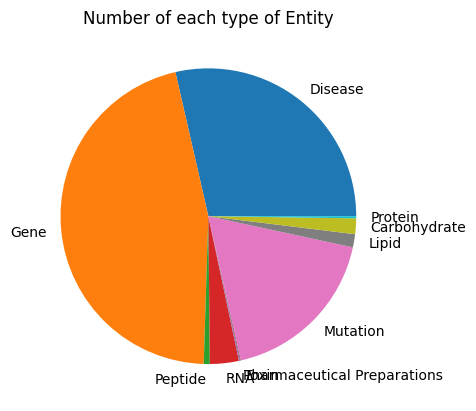

In [89]:
import matplotlib.pyplot as plt
plt.pie(EntityCount.values(), labels=EntityCount.keys())
plt.title('Number of each type of Entity')

Text(0.5, 1.0, 'Number of each type of Relation')

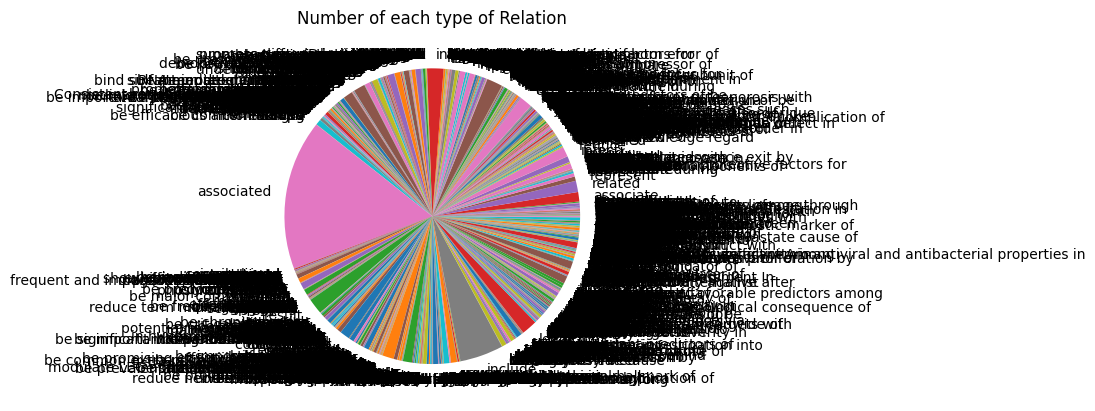

In [90]:
plt.pie(RelationCount.values(), labels=RelationCount.keys())
plt.title('Number of each type of Relation')

Also interesting to look at the number of times each type of node is connected to each other type of node.

In [91]:
EntityEntityCounts = dict.fromkeys(EntityTypes,0)
for k in EntityEntityCounts.keys():
    EntityEntityCounts[k] = dict.fromkeys(EntityTypes,0)

for k in edgekeys:
    source = edges[k]['source type'][0]
    target = edges[k]['target type'][0]
    EntityEntityCounts[source][target] += 1

for k in EntityTypes:
    print(EntityEntityCounts[k])

{'Disease': 80822, 'Gene': 6809, 'Peptide': 206, 'RNA': 71, 'Pharmaceutical Preparations': 12, 'Toxin': 7, 'Mutation': 455, 'Lipid': 1126, 'Carbohydrate': 1287, 'Protein': 170}
{'Disease': 12807, 'Gene': 4187, 'Peptide': 76, 'RNA': 50, 'Pharmaceutical Preparations': 1, 'Toxin': 0, 'Mutation': 273, 'Lipid': 317, 'Carbohydrate': 374, 'Protein': 50}
{'Disease': 375, 'Gene': 99, 'Peptide': 19, 'RNA': 0, 'Pharmaceutical Preparations': 0, 'Toxin': 0, 'Mutation': 1, 'Lipid': 12, 'Carbohydrate': 22, 'Protein': 0}
{'Disease': 200, 'Gene': 81, 'Peptide': 0, 'RNA': 7, 'Pharmaceutical Preparations': 0, 'Toxin': 0, 'Mutation': 4, 'Lipid': 3, 'Carbohydrate': 3, 'Protein': 0}
{'Disease': 21, 'Gene': 0, 'Peptide': 0, 'RNA': 0, 'Pharmaceutical Preparations': 0, 'Toxin': 0, 'Mutation': 0, 'Lipid': 0, 'Carbohydrate': 2, 'Protein': 0}
{'Disease': 4, 'Gene': 0, 'Peptide': 0, 'RNA': 0, 'Pharmaceutical Preparations': 0, 'Toxin': 2, 'Mutation': 0, 'Lipid': 0, 'Carbohydrate': 0, 'Protein': 0}
{'Disease': 634, 

## Creating the Ontology

Now we are in a position to create the ontology. A major challenge here is that we need to do this dynamically. Our approach will be to store the classes in a `dictionary` from where they can still be called.

We will first create the entities.

In [92]:
from owlready2 import *
import types

onto = get_ontology("http://www.dummy.info/new.owl")

with onto:
    EntityClass = dict.fromkeys(EntityTypes, None)
    print(EntityClass)
    for t in EntityTypes:
       EntityClass[t] = types.new_class(t, (Thing,))
       print(EntityClass[t])
    print(EntityClass)

{'Disease': None, 'Gene': None, 'Peptide': None, 'RNA': None, 'Pharmaceutical Preparations': None, 'Toxin': None, 'Mutation': None, 'Lipid': None, 'Carbohydrate': None, 'Protein': None}
new.Disease
new.Gene
new.Peptide
new.RNA
new.Pharmaceutical Preparations
new.Toxin
new.Mutation
new.Lipid
new.Carbohydrate
new.Protein
{'Disease': new.Disease, 'Gene': new.Gene, 'Peptide': new.Peptide, 'RNA': new.RNA, 'Pharmaceutical Preparations': new.Pharmaceutical Preparations, 'Toxin': new.Toxin, 'Mutation': new.Mutation, 'Lipid': new.Lipid, 'Carbohydrate': new.Carbohydrate, 'Protein': new.Protein}


Now we create the relationships. For this, we need to determine the domain and range for each type of relation

In [93]:
RelationDomainRange = dict.fromkeys(RelationTypes,None)
for r in RelationTypes:
    RelationDomainRange[r] = {'Domain':set(), 'Range':set()}

for k in edgekeys:
    relationtype = edges[k]['relationship']
    source = edges[k]['source type']
    target = edges[k]['target type']
    RelationDomainRange[relationtype]['Domain'].add(source[0])
    RelationDomainRange[relationtype]['Range'].add(target[0])

#for r in RelationDomainRange.keys():
#    print(f"{r}: {RelationDomainRange[r]}")


Now we have this, we can create the relations

In [94]:
Relations = dict.fromkeys(RelationTypes, None)
with onto:
    for t in RelationTypes:
        Relations[t] = types.new_class(t, (ObjectProperty,))
        domain = list(RelationDomainRange[t]['Domain'])
        range =  list(RelationDomainRange[t]['Range'])
        for d in domain:
            Relations[t].domain.append(EntityClass[d])
        for r in range:
            Relations[t].range.append(EntityClass[r])

Check this this looks sensible against the ones printed out above

In [95]:
print(Relations['conceived'].domain)
print(Relations['noticed'].range)

[new.Disease, new.Gene, new.Disease, new.Gene]
[new.Disease, new.Gene, new.Disease, new.Gene]


Let's now populate the graph. Start by adding the Entities

In [96]:
TheGraph = dict.fromkeys(nodekeys, None)
for n in nodekeys:
    etype = nodes[n][0]['type']
    TheGraph[n] = EntityClass[etype](name=n)
    TheGraph[n].rel = []

Now the edges

In [97]:
TheGraph = dict.fromkeys(nodekeys, None)
for n in nodekeys:
    nodetype = nodes[n][0]['type']
    TheGraph[n] = EntityClass[nodetype](name=n)
    TheGraph[n].rel = []

for k in edgekeys:
    source = edges[k]['source entity']
    target = edges[k]['target entity']
    TheGraph[source].rel.append(TheGraph[target])

Get the edges for one node.

In [98]:
TheGraph['MLH1'].rel

[new.ARID1A,
 new.Neoplasms,
 new.Microsatellite Instability,
 new.Death,
 new.rs1800734,
 new.rs749072,
 new.rs13098279,
 new.rs1800734,
 new.rs749072,
 new.rs13098279,
 new.Colorectal Neoplasms,
 new.Celiac Disease,
 new.Neoplasms,
 new.Hereditary Breast and Ovarian Cancer Syndrome]

Which nodes has the most connections from it?
Which node has the most connections to it?

In [99]:
max_links = 0
for n in TheGraph.keys():
    if len(TheGraph[n].rel)> max_links:
        max_links = len(TheGraph[n].rel)
        max_node = n

print(f"{max_node} has the most ({max_links}) outgoing links")

Death has the most (4741) outgoing links


In [100]:
IncomingLinks = dict.fromkeys(nodekeys,0)
for n in TheGraph.keys():
    targets = TheGraph[n].rel
    for t in targets:
        IncomingLinks[t.name] += 1

print(f"{max(IncomingLinks, key=lambda k: IncomingLinks[k])} has the most incoming links ({max(IncomingLinks.values())})")

Death has the most incoming links (6020)
